# Computation of the eigenvalues of the covariance associated with CIFAR-10 Gaussian

In this notebook, we compute the Gaussian distribution fitted to the CIFAR-10 dataset and the eigenvalues of the associated covariance matrix. Ones can replace CIFAR-10 by another dataset.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import scipy
import matplotlib.pyplot as plt
import numpy as np

## 1. Observation of some images of the dataset

Files already downloaded and verified


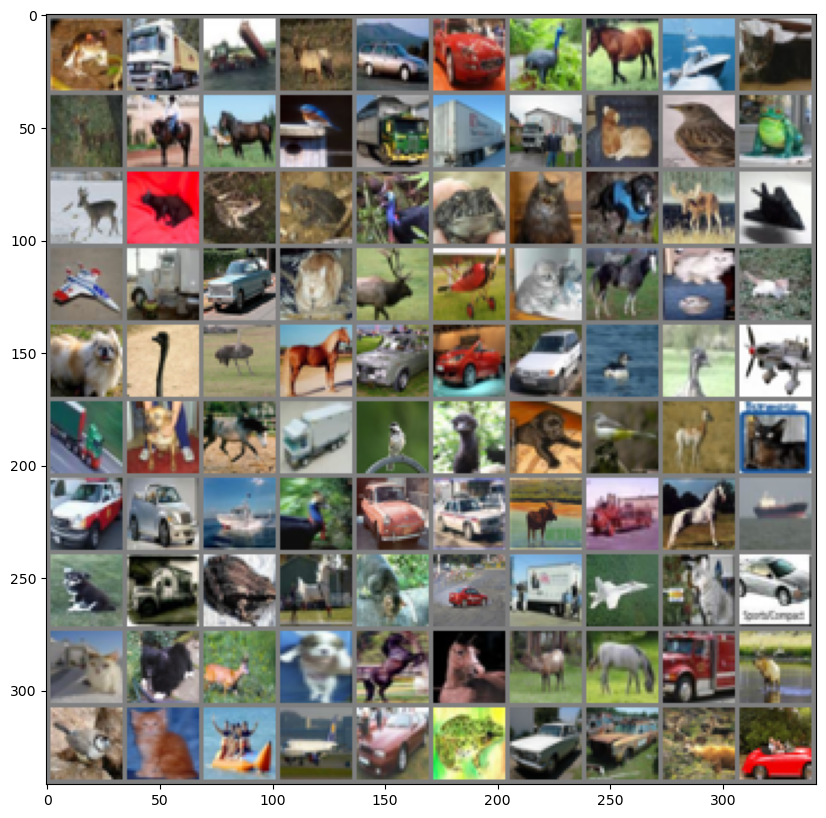

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images, 10))

_, nc, w, h = images.shape

## 2. Computation of the associated Gaussian

We evaluate the covariance matrix by computing the empirical covariance of the dataset.

In [3]:
#Storage of all the dataset in all_images
num_images = len(trainset)
all_images = torch.empty((len(trainset), nc, w, h))

for i, data in enumerate(trainloader, 0):
    all_images[i*batch_size:(i+1)*batch_size,:,:,:] = data[0]

print('all_images has shape:', all_images.shape)

all_images has shape: torch.Size([50000, 3, 32, 32])


In [4]:
#Computation of the empirical covariance matrix
C = torch.cov(all_images.reshape((num_images, -1)).transpose(0,1))

In [5]:
#Computation of the eigenvalues of the covariance matrix
vps,Q = np.linalg.eigh(C)
vps *= (vps > 0.) # due to digital rounding errors

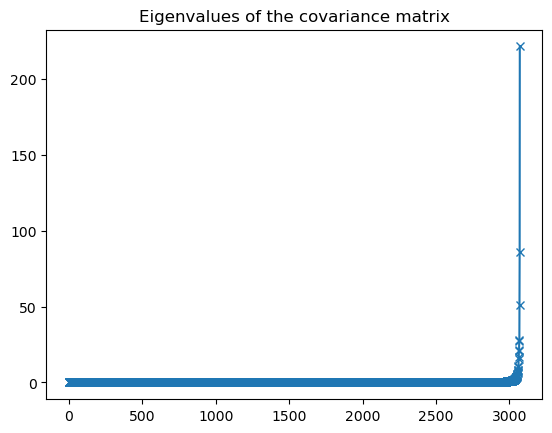

In [6]:
plt.title('Eigenvalues of the covariance matrix')
plt.plot(vps,'-x')

## 3. Some Gaussian samples

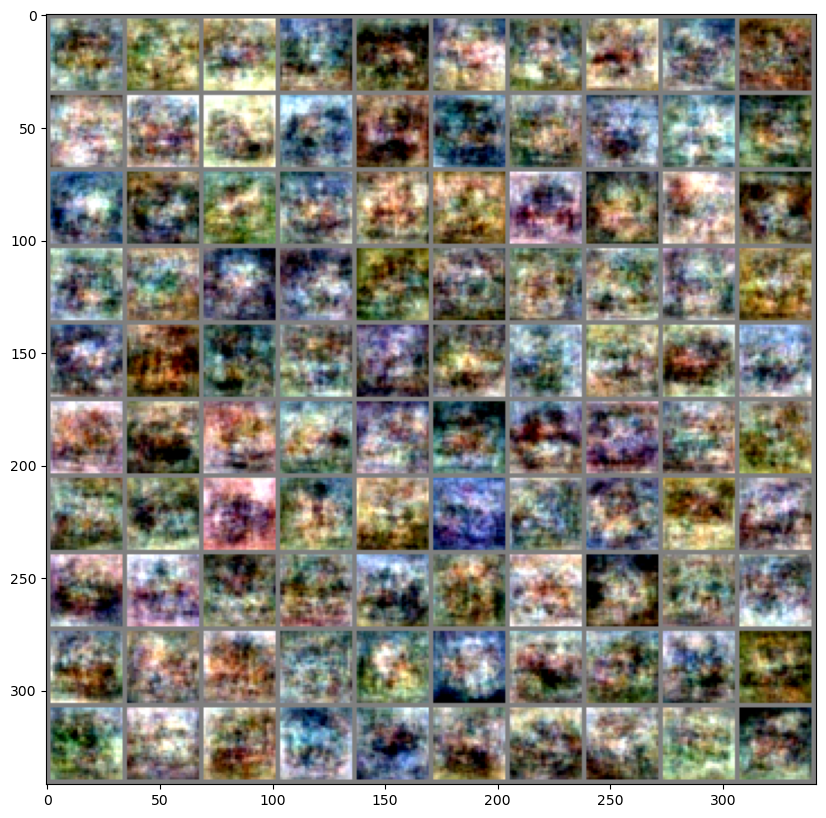

In [7]:
mu = torch.mean(all_images,dim=0)
cholesky_cov = torch.tensor(np.real(scipy.linalg.sqrtm(C)))

batch_size = 100
dim = 3*32*32

samples = mu+torch.mm(torch.randn((batch_size, dim)), cholesky_cov).reshape(batch_size,3,32,32)

imshow(torchvision.utils.make_grid(samples.clip(-1,1), 10))